<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.3
# *KNN classification Lab*

**In this lab, we will:**
- Practice KNN classification on a dataset of breast cancer.
- Predict the `diagnoosis` of a patient from predictor variables of your choice.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [20]:
# Import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from itertools import combinations

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier


%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('fivethirtyeight')

In [2]:
# Load data
breast_cancer_csv = '/Users/stephanienduaguba/Documents/DATA/breast-cancer-wisconsin-data.csv'
breast_cancer = pd.read_csv(breast_cancer_csv, index_col ='id')
breast_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Drop column "Unnamed: 32"
breast_cancer = breast_cancer.drop('Unnamed: 32', axis=1)

### 2. EDA

Explore dataset. Clean data. Find correlation.

In [4]:
# Number of rows and columns
breast_cancer.shape

(569, 31)

In [5]:
# Display information about the dataset
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

In [6]:
# Number of null values per column
breast_cancer.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
# Calculate the percentage distribution of the 'diagnosis' column
(breast_cancer['diagnosis'].value_counts(normalize=True) * 100)

diagnosis
B    62.741652
M    37.258348
Name: proportion, dtype: float64

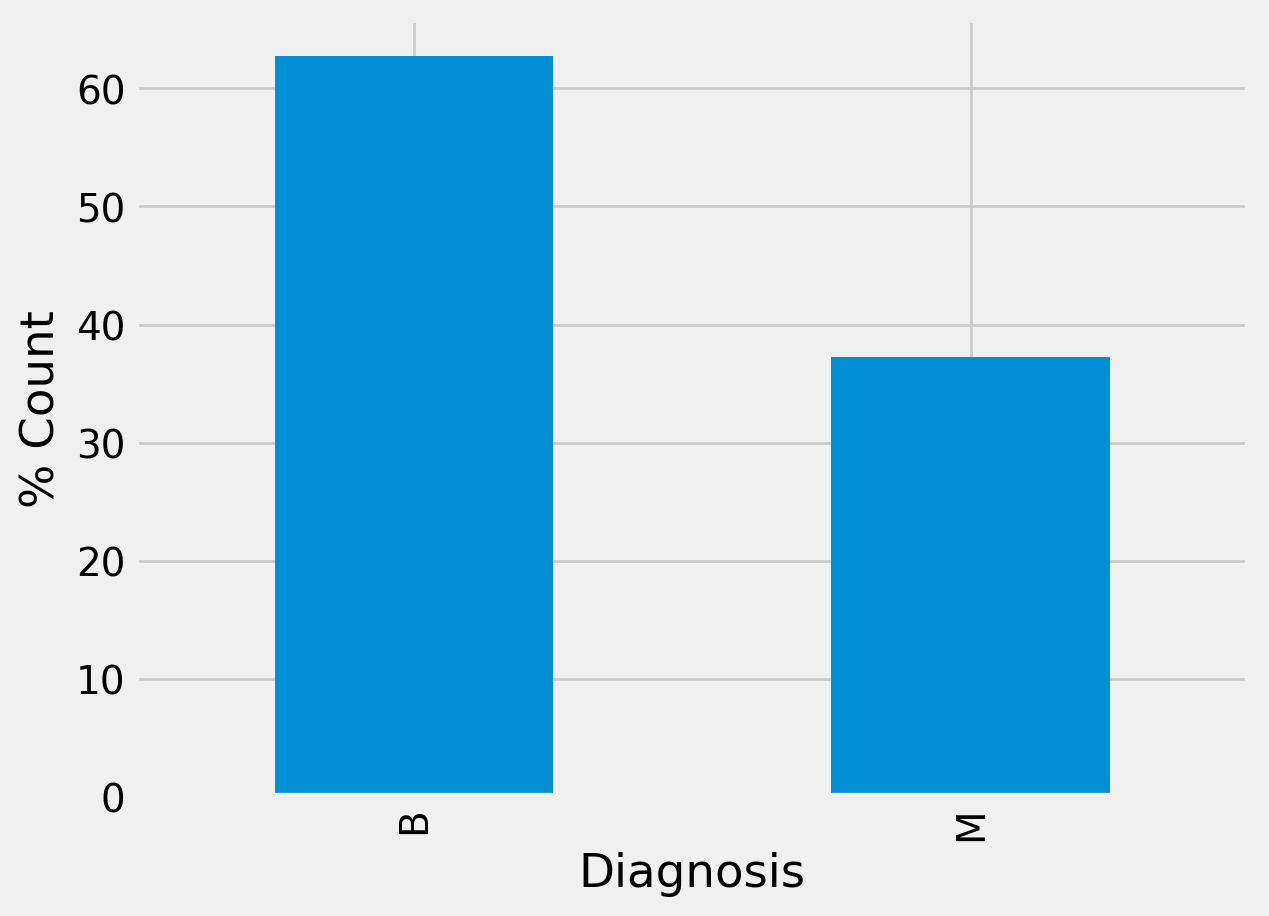

In [8]:
# Plot of distribution of the 'diagnosis' values
(breast_cancer['diagnosis'].value_counts(normalize=True) * 100).plot(kind='bar')
plt.ylabel('% Count')
plt.xlabel('Diagnosis')
plt.show()

In [9]:
# Convert values for 'diagnosis' to numbers (B=0, M=1)
breast_cancer['diagnosis'] = (breast_cancer['diagnosis'] =='M').astype(int)
breast_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


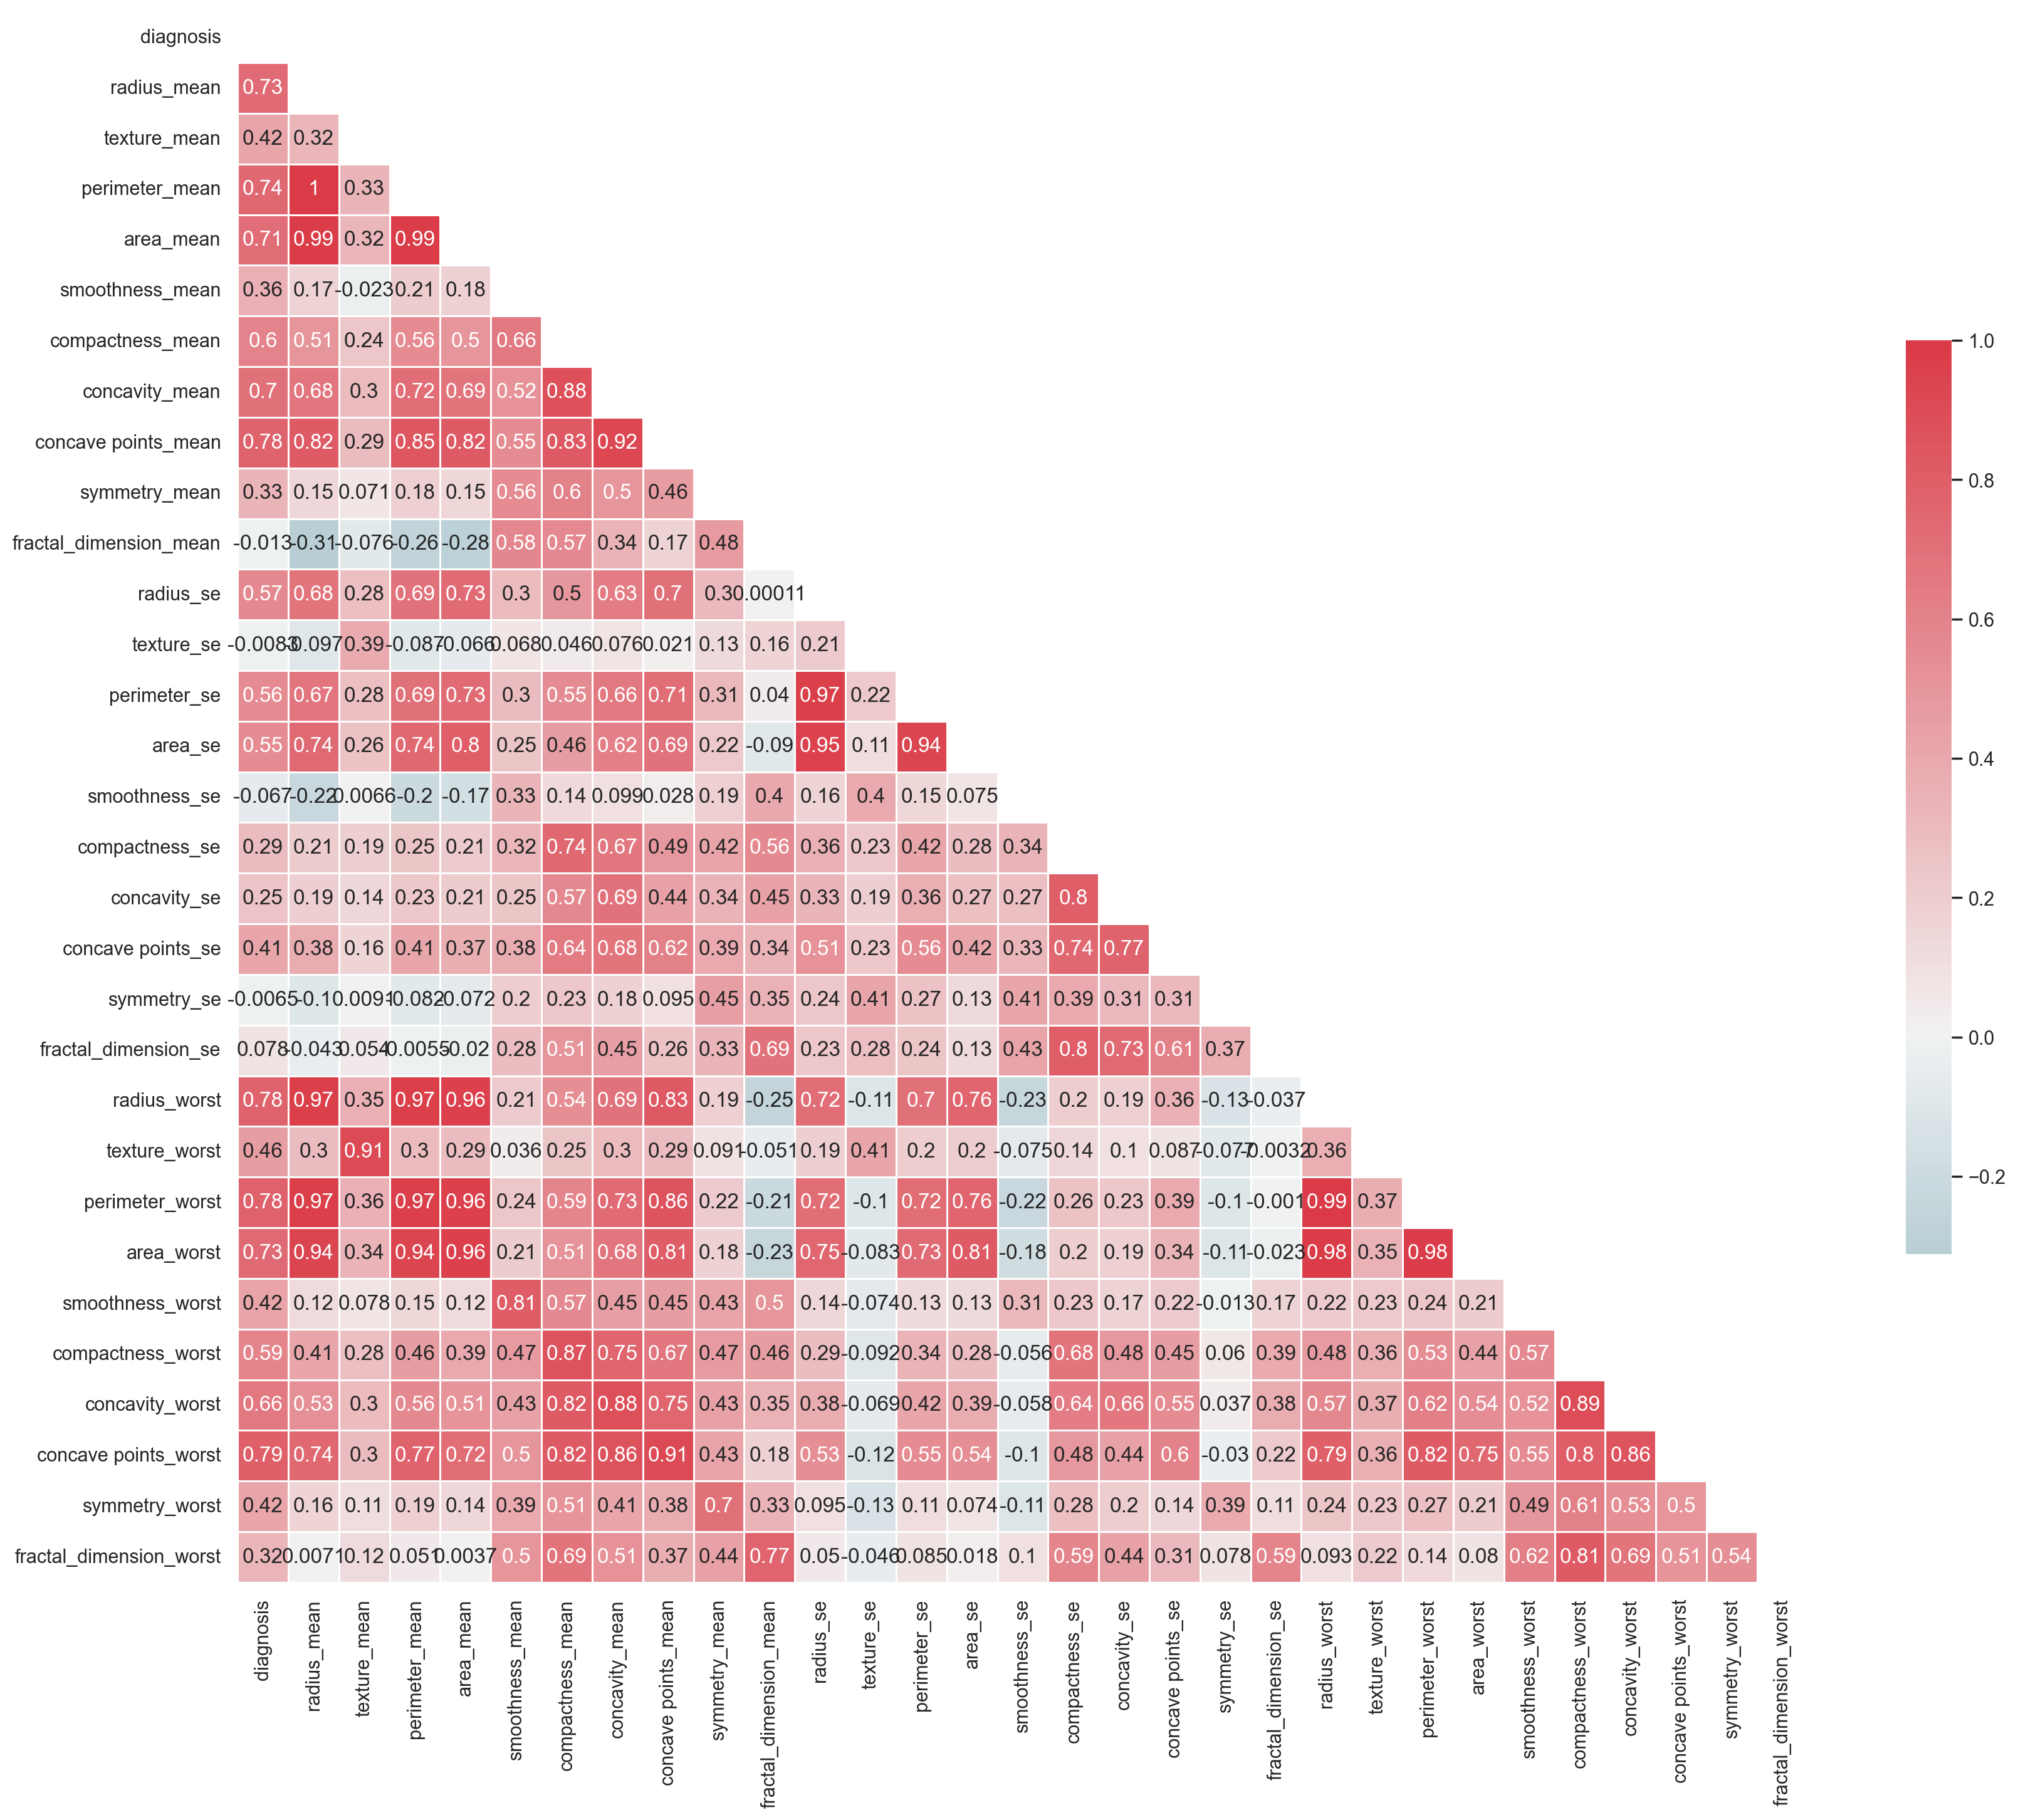

In [10]:
# Correlation heatmap
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(breast_cancer.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(breast_cancer.corr(), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show();

### 3. Set up the `diagnosis` variable as your target. How many classes are there?

In [11]:
# Answer - There are two classes (M & B) in the target variable
# Select diagnosis as target
y = breast_cancer['diagnosis']

### 4. What is the baseline accuracy?

In [13]:
# Answer - The baseline accuracy is 62.7..% 
# Assuming the baseline model always predicts majority of the class, i.e. 0 == Benign
y.value_counts(normalize=True)

diagnosis
0    0.627417
1    0.372583
Name: proportion, dtype: float64

### 5. Choose features to be your predictor variables and set up your X.

In [14]:
# Answer - Choosing all but the target variable
X = breast_cancer.drop('diagnosis', axis=1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
# Create training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [18]:
# Feature selection
from sklearn.feature_selection import SequentialFeatureSelector

# Create a LinearRegression model
model = LinearRegression()

# Initialize SequentialFeatureSelector for forward selection
# Choose the number of features to select (k_features) and the scoring metric (e.g., 'r2')
sfs = SequentialFeatureSelector(model, direction='forward', n_features_to_select='auto', tol=1e-5, scoring='r2', cv=5)

# Fit the SequentialFeatureSelector to the training data
sfs.fit(X_train, y_train)

# Get the selected feature names and their scores at each step
selected_features = list(X_train.columns[sfs.support_])
selected_features

['perimeter_mean',
 'area_mean',
 'concave points_mean',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'area_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst']

### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [19]:
# Answer
# Make an instance of a KNeighborsClassifier object with 1 neighbor
knn = KNeighborsClassifier(n_neighbors=1)

# Fit on the unstandardized data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [22]:
# Answer
# Predict the response values for the observations in X ("test the model")
# Store the predicted response values
y_pred = knn.predict(X)

# Compute classification accuracy
print(accuracy_score(y, y_pred))

1.0


### 8. Create a 80-20 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [28]:
# Answer

# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
# Answer: Completed above in # 5

# STEP 2: train the model on the training set (using K=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# STEP 3: test the model on the testing set, and check the accuracy
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9298245614035088


### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [29]:
# ANSWER
# Create an instance of KNeighborsClassifier where n_neighbors = number of rows in the training data
# Find rows in X_train
k = X_train.shape[0]

# Fit train data
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Print accuracy_score
print(accuracy_score(y_test, y_pred))

0.6228070175438597


### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

In [32]:
# Answer    
# Initialize an empty list to store test accuracies
test_acc = []

# Iterate over a range of k values for the number of neighbors
for i in range(1, X_train.shape[0] + 1):
    # Create a KNeighborsClassifier with current number of neighbors (k)
    knn = KNeighborsClassifier(n_neighbors=i)
    
    # Fit the model on the training data
    knn.fit(X_train, y_train)
    
    # Calculate and append the test accuracy for the current k value
    test_acc.append(knn.score(X_test, y_test))

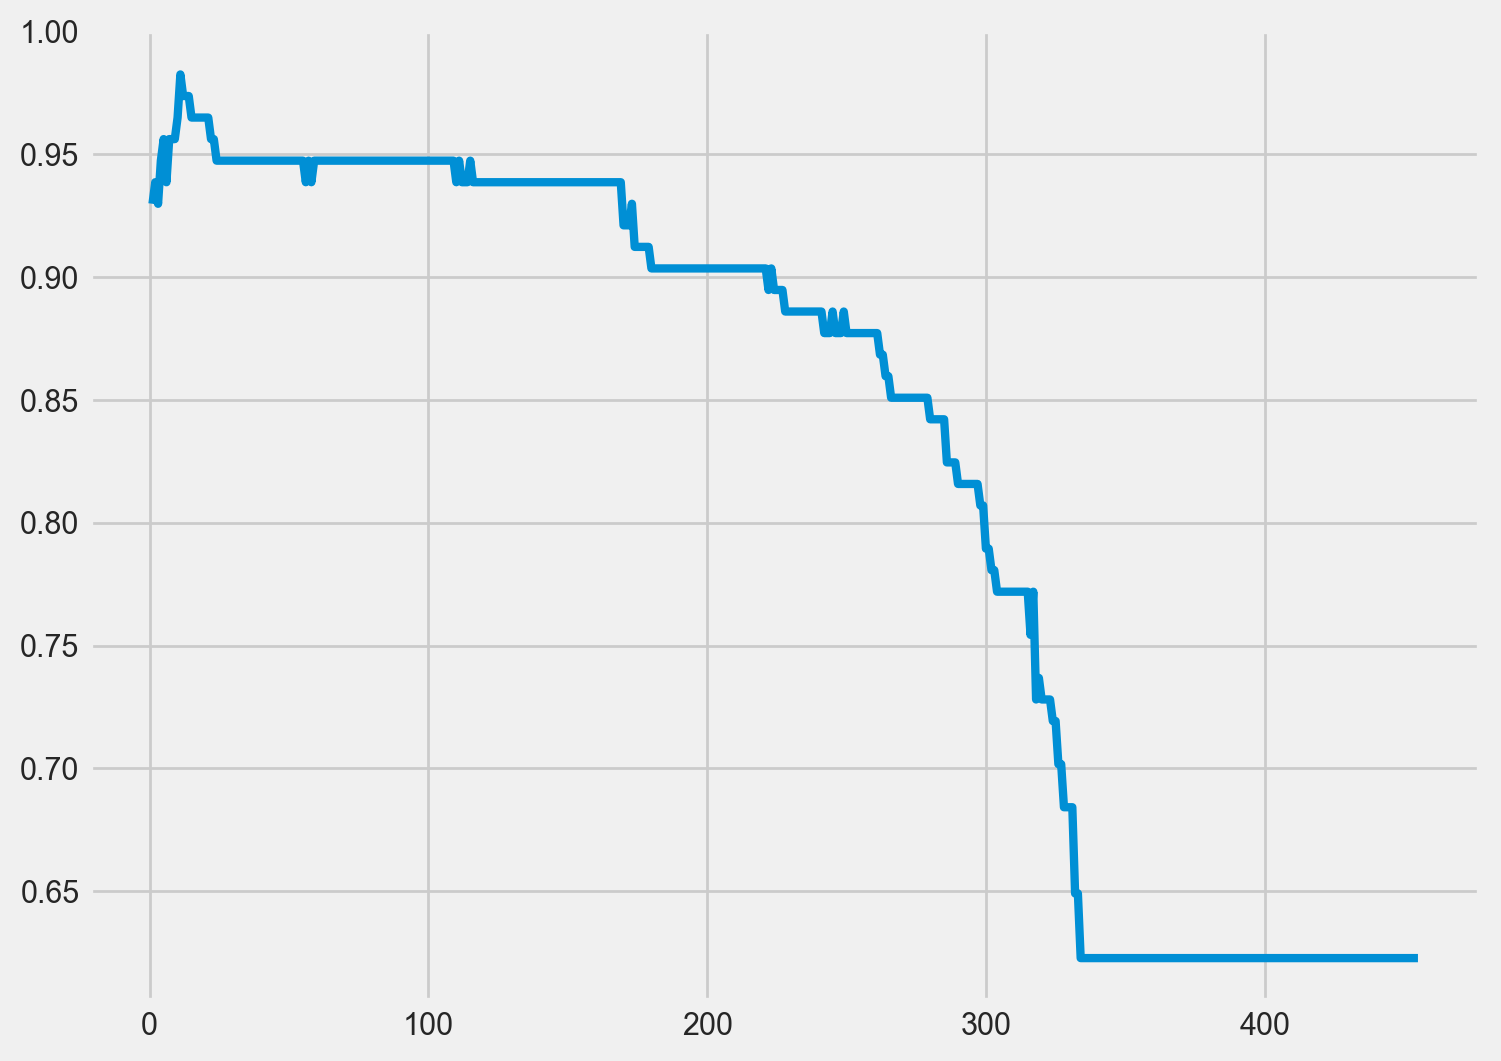

In [33]:
# Plot test accuracy by number of neighbors
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(list(range(1, X_train.shape[0]+1)), test_acc, lw=3.)
plt.show()

### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.


In [36]:
# Answer
from sklearn.model_selection import cross_val_score

# Specify the number of folds for cross-validation
folds = 5

# Calculate the maximum number of neighbors (k) to consider
max_neighbors = np.floor(X.shape[0] - X.shape[0] / 5)

# Print the maximum number of neighbors
print(max_neighbors)

# Initialize an empty list to store test accuracies
test_acc = []

# Iterate over a range of k values for the number of neighbors
for i in range(1, int(max_neighbors)):
    # Create a KNeighborsClassifier with the current number of neighbors (k)
    knn = KNeighborsClassifier(n_neighbors=i)
    
    # Calculate the mean cross-validated score and append it to the list
    test_acc.append(np.mean(cross_val_score(knn, X, y, cv=5)))

# Print the maximum test accuracy obtained
print(max(test_acc))

455.0
0.935010091600683


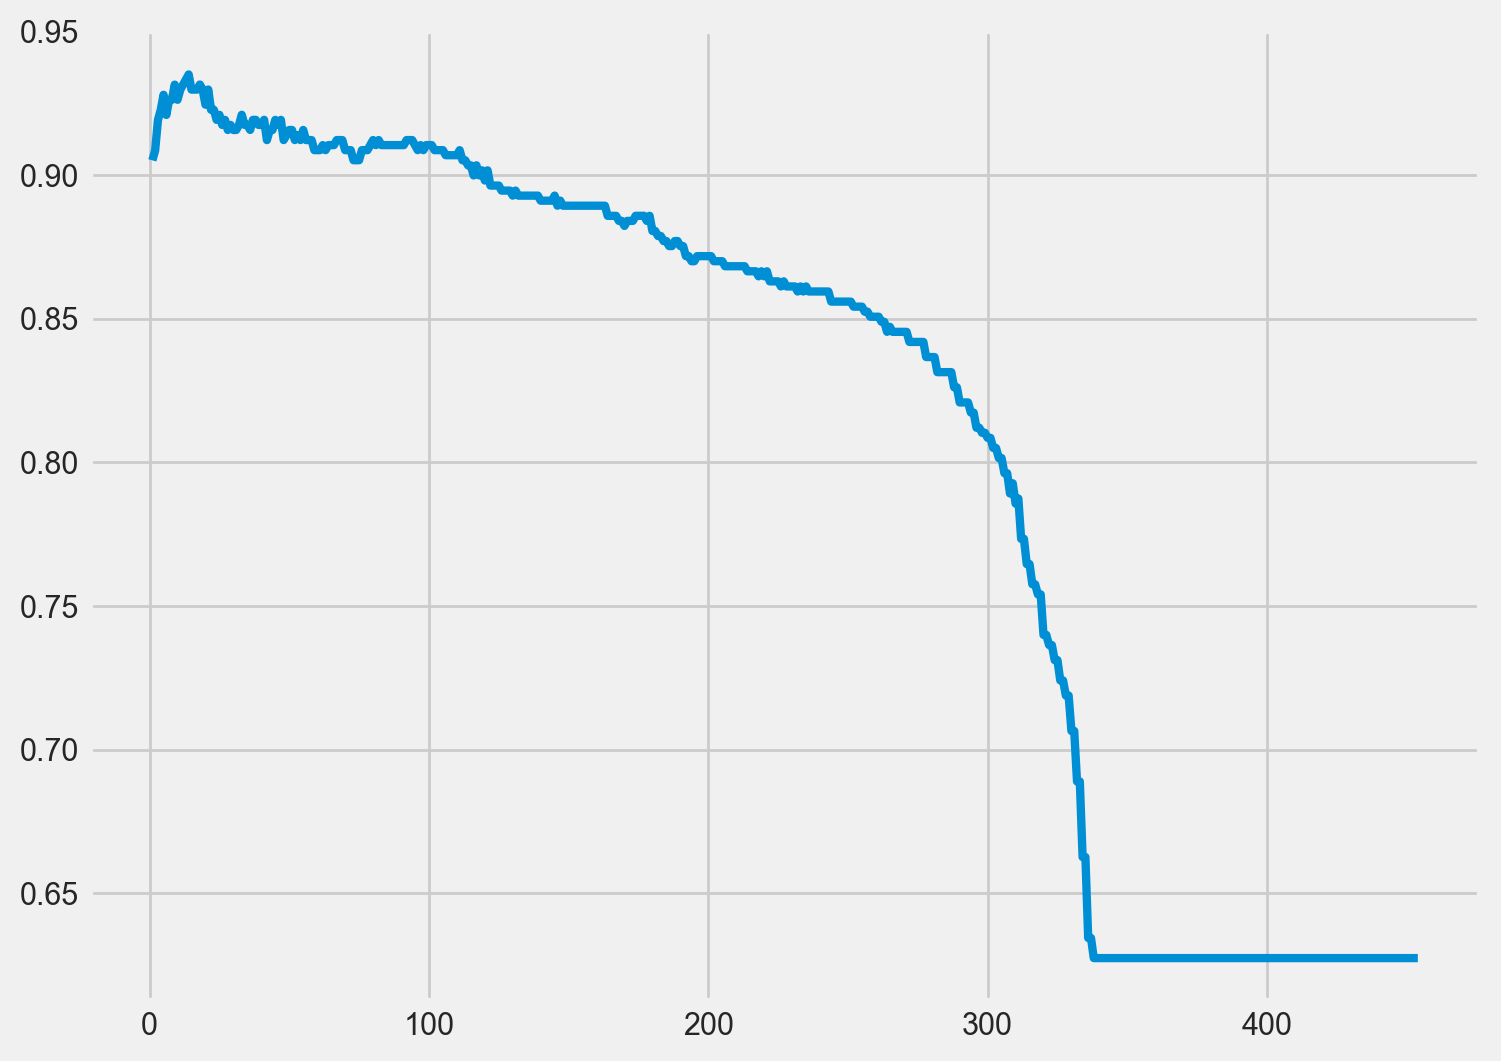

In [38]:
# Plot the accuracy vs. neighbours in KNN model
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(list(range(1, int(max_neighbors))), test_acc, lw=3)
plt.show()

### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [39]:
# Answer
# Standarize X
ss = StandardScaler()
Xs = ss.fit_transform(X)

In [40]:
# Answer
# Plot test accuracy by number of neighbors
test_acc_std = []

# Iterate over a range of k values for the number of neighbors
for i in range(1, int(max_neighbors)):
    # Create a KNeighborsClassifier with the current number of neighbors (k)
    knn = KNeighborsClassifier(n_neighbors=i)
    
    # Calculate the mean cross-validated score and append it to the list
    test_acc_std.append(np.mean(cross_val_score(knn, Xs, y, cv=5)))

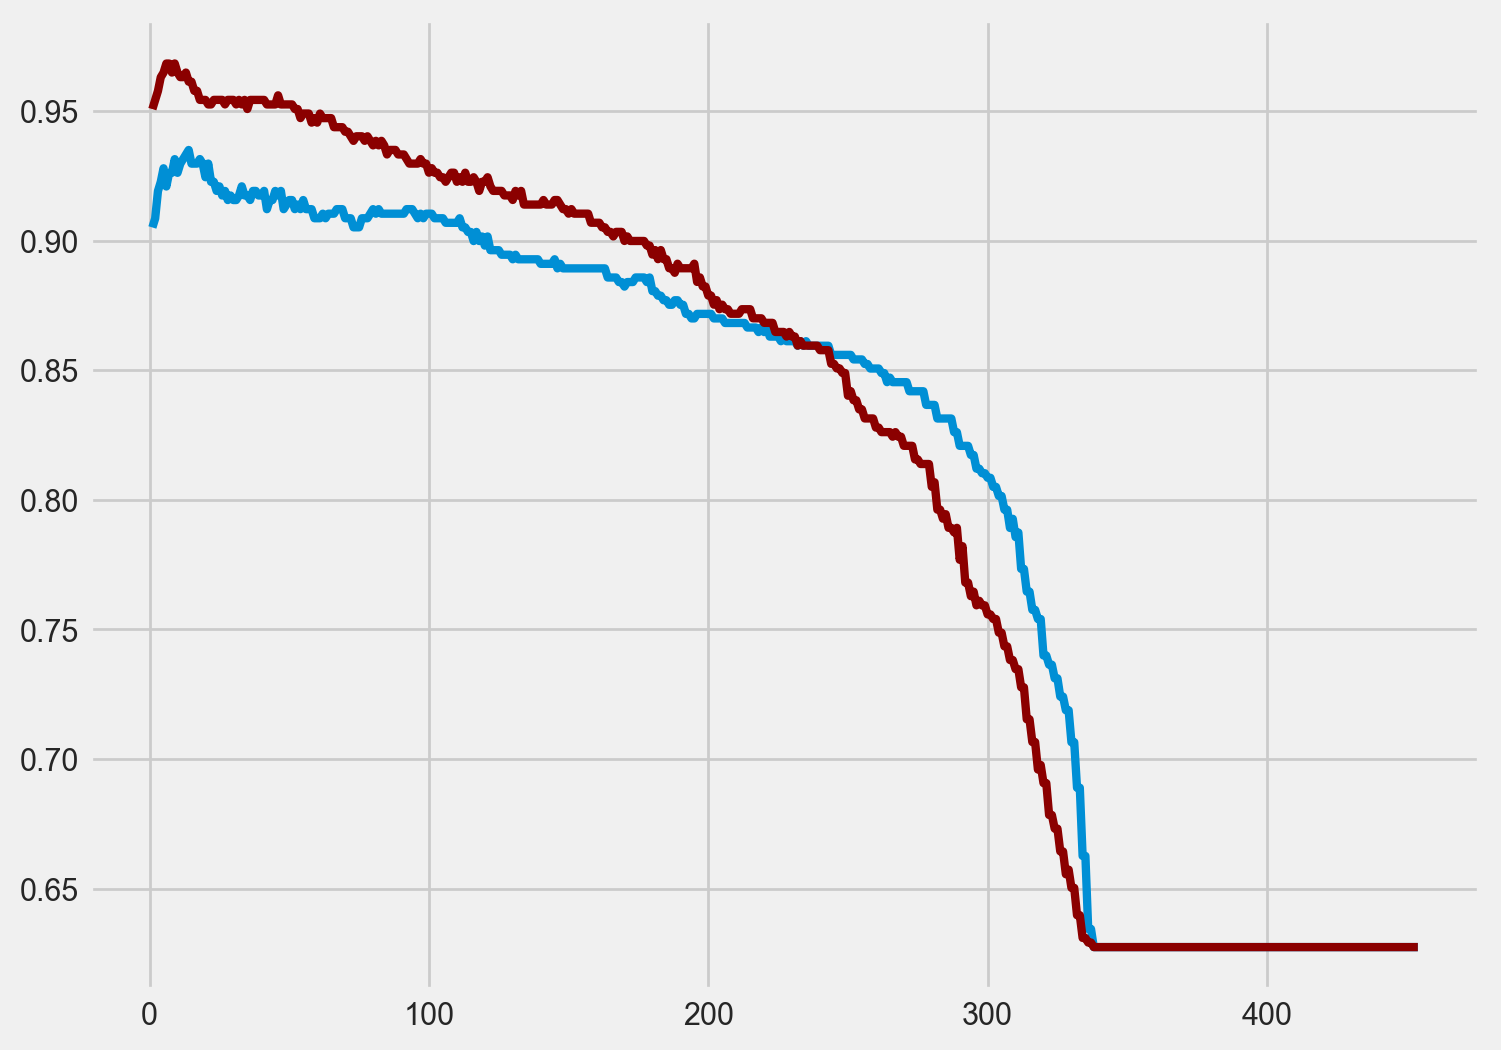

In [41]:
# Plot the standardized mean cross-validated accuracy against the unstandardized
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(list(range(1, int(max_neighbors))), test_acc, lw=3.)
ax.plot(list(range(1, int(max_neighbors))), test_acc_std, lw=3., color='darkred')
plt.show()

Answer: The standardized mean cross-validated accuracy performs better than the unstandardized model. In the context of k-nearest neighbors (KNN), which relies on distances between data points, standardization is often beneficial. If the features are on different scales, the algorithm might give more weight to features with larger scales, leading to suboptimal performance.

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



